## Review questions:
1) What is an ensemble?

2) How can we make *independant* predictors in an ensemble? 

3) Is this a good idea to add multiple predictors of the same type (e.g., two decision trees with the same traing set, but slightly different parameters)?

4) If you want to have an ensemble of 100+ predictors, can you do voting classifiers? If not, what is you choice?

5) In random forest, what are the tricks to make the trees *independent*?

6) Explain briefly what is AdaBoost, what are the common things between AdaBoost and random forest?

7) What are the different aspects between AdaBoost and random forest?

8) Explain the trade-off between learning_rate and n_estimators in AdaBoost.

9) How does a random forest calculate the feature importance?

10) How do we know what features/how many features we should use to build a model?

# Support Vector Machines 

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning
model. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

## Linear SVM Classification

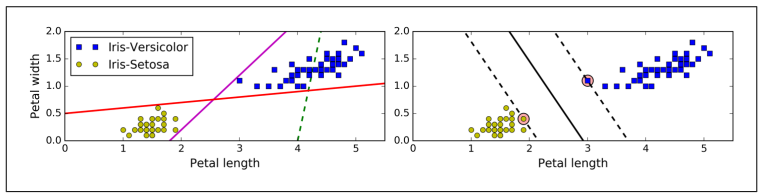

In [ ]:
#both pink and red line could be considered boundaries between the two classes. Which line is better?
    #try instead of drawing one line, draw a margin between two classes. 
    #this margin should be as wide as possible
        #then draw line in the middle, should be the best separation of those two classes. 
         

The two classes can clearly be separated easily with a straight line (they are **linearly separable**).

The solid line in the plot on the right represents the decision boundary of an SVM classifier;  this  line  not  only  separates  the  two  classes  but  also  stays  as  far  away  from  the
closest training instances as possible. You can think of an SVM classifier as fitting the
widest possible street (represented by the parallel dashed lines) between the classes.
This is called **large margin classification**.

Notice that adding more training instances “off the street” will not affect the decision
boundary at all: it is fully determined (or “supported”) by the instances located on the
edge  of  the  street.  These  instances  are  called  the  **support vectors**.

SVMs  are  *sensitive*  to  the  feature  scales, remember to apply  Scikit-Learn’s  **StandardScaler**.

In [ ]:
#hard margin classification- want 100% accuracy. Cannot do with an outlier not linearly seperable 

## Soft Margin Classification
If we strictly impose that all instances be off the street and on the right side, this is
called **hard margin classification**.
- only works if the data is linearly separable
- sensitive to outliers
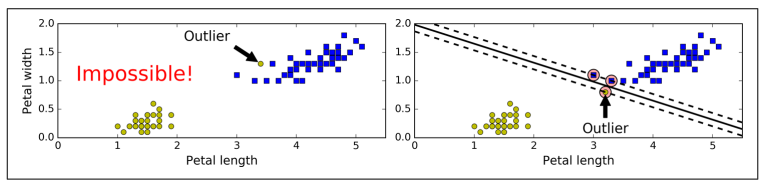

In [ ]:
#soft margin: allow some of the outliers to be within the margin (the outliers don't define our margin)

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called **soft margin classification**.

### C  hyperparameter: 
- a smaller  C  value leads to a wider street but more margin violations
- a  high  C   value  the  classifier  makes fewer margin violations but ends up with a smaller margin

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

#scaler sent to pipeline
#then SVC model in pipeline
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [2]:
svm_clf.predict([[5.5, 1.7]]) #predict class of fake sample. 

array([1.])

LinearSVC model has two attributes *coef* and *intercept*. See http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html.

In [4]:
#need coefficient and intercept so can draw a line to separate on

In [5]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [6]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42) #very small C
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42) #very large C

#pipeline with small C
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

#pipeline with big C
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1] #want to plot support vectors into graph
svm_clf2.support_vectors_ = X[support_vectors_idx2]#have to put them back from scaled to un-scaled 

In [8]:
type(X)

numpy.ndarray

In [9]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [10]:
X[:, 0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

[4, 6, 0.8, 2.8]

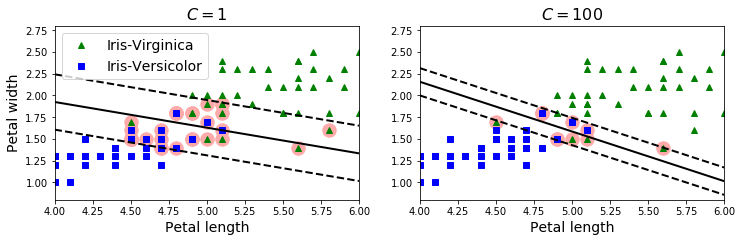

In [11]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])


#### Discuss: 

If we find a soft margin linear SVM classifier got influenced too much by a few outliers, should we increase, or reduce the c value?

--If you are seeing decision boundary is being pushed by one outlier, you want to decrease C value. The more noise/violators, the smaller the C value. Allow more samples to 'stay on the street' margin we created 

<font color='red'> reducing the c to allow more samples (likely to be outliers) on the street</font> 


Use small or big?--depends on the data
    if you know beautiful is beautifcul, don't want to use small C
    if you suspect data is very noisy, you want to use a small C
    

    

## Exercise:

- Load the cancer dataset built-in to sklearn.
- Use two features only ('worst radius', 'worst concavity')  -- we will discuss more about how to choose "best features" later in feature engineering lecture.
- Visualize the cancer dataset with those two features as x and y axes.
- Apply StandardScaler and LinearSVC to the dataset
- Visualize the class boundary and support vectors with the helper function *plot_svc_decision_boundary*.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
cancer = load_breast_cancer()
# the data type of cancer is actually Bunch.
# some useful attributes:
# cancer['data'] - get the dataset
# cancer['DESCR'] - get the description
# cancer['feature_names'] - get all the attribute names
# cancer['target'] - the labels (binary)
# cancer['target_names'] - the names of 
print(type(cancer))

<class 'sklearn.utils.Bunch'>


The data set is presented in a dictionary form:

In [15]:
cancer.keys() #in the dictionary, we have these keys: data, value: data. etc. 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [16]:
# get more info for breast cancer dataset
# you can see how many samples and how many attributes are in this dataset
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [17]:
cancer['feature_names'] # a lot of features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Set up DataFrame

In [18]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names']) #use pandas to make dataframe from massive list
df_feat.head(3) #just put everything back into dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [19]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
target = cancer['target'] #make that part of dataframe we are working with 

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# feature selection: find two most importatn features
# we will talk more about feature selection later...
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import RFE #recursive feature elimination. 
    #eliminate the unimportant features using ML model 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# recursive feature elimination
rfe = RFE(model,4) #specify I want to leave 4 features in the end
rfe = rfe.fit(df_feat, target)
# display the relative importance of each attribute
print(rfe.support_)
print(rfe.ranking_)
# get the most important 4 column names
df_feat.columns[rfe.support_]

#4 trues corresponding to all the features. Then the names are texture error, worst radius, worst compactnee, worst con

[ True False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False  True False False False]
[ 1 12 14 27 15 19  1  3  9 23  5 10  4  8 24 25 16 21 20 26  1 11  6 22
 17  7  1  2 18 13]


Index(['mean radius', 'mean concavity', 'worst radius', 'worst concavity'], dtype='object')

In [34]:
#I want to just select these two (of the top four) features
#df_feat
#df_feat_select_2 = pd.DataFrame(df_feat[['worst radius', 'worst concavity']]) #only two features so can use linear separation and visualize in 2D
#df_feat_select_2.head()
#This worked but below is his

In [35]:
df_feat_select_2 = df_feat[['worst radius','worst concavity']]
df_feat_select_2.head()

,worst radius,worst concavity
0,25.38,0.7119
1,24.99,0.2416
2,23.57,0.4504
3,14.91,0.6869
4,22.54,0.4000


In [22]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [36]:
# Add 'target' as a feature to the dataset
df_feat_select_2['target'] =target #add target column as target here
df_feat_select_2.head()

,worst radius,worst concavity,target
0,25.38,0.7119,0
1,24.99,0.2416,0
2,23.57,0.4504,0
3,14.91,0.6869,0
4,22.54,0.4000,0


In [37]:
# How do we get the 'mean concavity' values for the records with 'target' equals 0?
#select only the rows where it equals 0 
#this is masking? who knew 
#select all the records with the target == 0, then apply this mask to the dataset. So we got all the records with target=0
#the select the worst radies with all the target equal 0
#because we want to separate all the 0's and 1's, and get x and y for both 

df_feat_select_2[df_feat_select_2['target']==0]['worst radius']

0      25.38
1      24.99
2      23.57
3      14.91
4      22.54
5      15.47
6      22.88
7      17.06
8      15.49
9      15.09
10     19.19
11     20.42
12     20.96
13     16.84
14     15.03
15     17.46
16     19.07
17     20.96
18     27.32
22     18.07
23     29.17
24     26.46
25     22.25
26     17.62
27     21.31
28     20.27
29     20.01
30     23.15
31     16.82
32     20.88
       ...  
444    20.38
446    21.53
449    25.68
451    21.44
460    22.96
461    36.04
468    21.57
479    17.39
487    23.96
489    19.18
492    21.53
498    22.75
499    23.86
501    16.01
503    30.79
509    17.11
512    16.41
514    17.58
516    21.86
517    23.73
521    29.92
533    23.23
535    24.30
536    15.29
562    17.52
563    24.29
564    25.45
565    23.69
566    18.98
567    25.74
Name: worst radius, Length: 212, dtype: float64

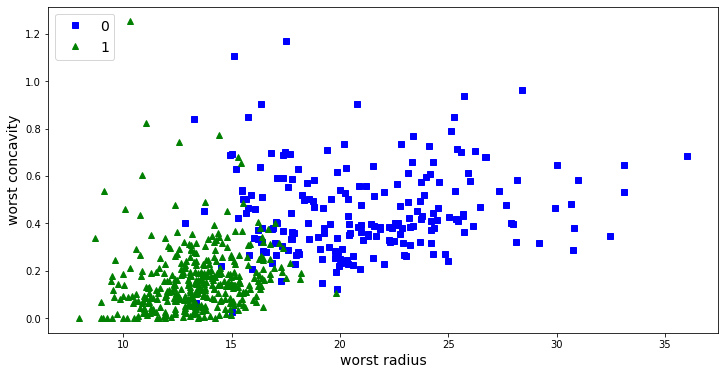

In [25]:
# Visualize two classes with worst radius as x-axis and worst concavity as y-axis
plt.figure(figsize=(12,6))

#get worst radius for target =0 (blue square == bs), 
plt.plot(df_feat_select_2[df_feat_select_2['target']==0]['worst radius'], df_feat_select_2[df_feat_select_2['target']==0]['worst concavity'],"bs", label="0")

#get worst radius for target =1, (green triangle ==g^)
plt.plot(df_feat_select_2[df_feat_select_2['target']==1]['worst radius'], df_feat_select_2[df_feat_select_2['target']==1]['worst concavity'],"g^", label="1")

#add some labels
plt.xlabel("worst radius", fontsize=14)
plt.ylabel("worst concavity", fontsize=14)
plt.legend(loc="upper left", fontsize=14)


In [38]:
# Create a StandardScaler instance and a LinearSVC instance (called svm_clf) with c equals 0.1
scaler = StandardScaler()
svm_clf = LinearSVC(C=0.1, loss="hinge", random_state=42)
# Create a Pipeline with the scaler and linear svm model we just created
scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

X = df_feat_select_2[['worst radius', 'worst concavity']]
y = target
# Fit the svm pipeline with full dataset (with two columns 'worst radius'and 'worst concavity') and target
scaled_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [39]:
#convert scale back to original x and y axis
# Convert to unscaled parameters
b1 = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf.coef_[0] / scaler.scale_

svm_clf.intercept_ = np.array([b1])

svm_clf.coef_ = np.array([w1])


# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
svm_clf.support_vectors_ = X[support_vectors_idx1].values

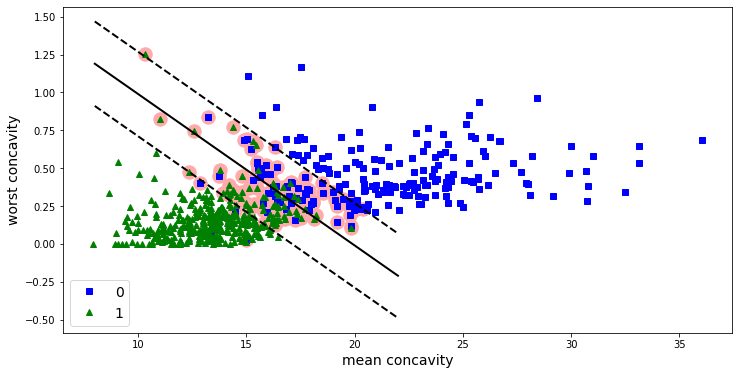

In [40]:
plt.figure(figsize=(12,6))

#plot decision boundaries
plt.plot(df_feat_select_2[df_feat_select_2['target']==0]['worst radius'], df_feat_select_2[df_feat_select_2['target']==0]['worst concavity'], "bs", label="0")
plt.plot(df_feat_select_2[df_feat_select_2['target']==1]['worst radius'], df_feat_select_2[df_feat_select_2['target']==1]['worst concavity'], "g^", label="1")

# call the "plot_svc_decision_boundary" to draw the decision boundary and the support vectors.
# the first parameter should be svm_clf,
# the 2nd and 3rd parameters should be the x-axis value you want to start and end the boundary.
plot_svc_decision_boundary(svm_clf, 8, 22)

plt.xlabel("mean concavity", fontsize=14)
plt.ylabel("worst concavity", fontsize=14)
plt.legend(loc="lower left", fontsize=14)



Make another visualization for another linear SVM with c=100:

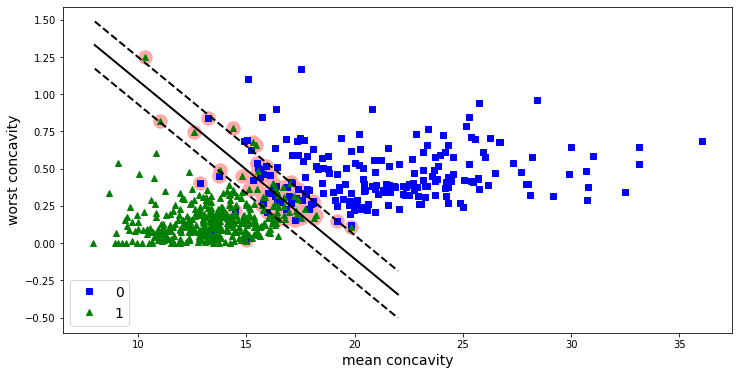

In [41]:
scaler = StandardScaler()
svm_clf = LinearSVC(C=100, loss="hinge", random_state=42) #use a very large C

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

X = df_feat_select_2[['worst radius', 'worst concavity']]
y = target
scaled_svm_clf.fit(X, y)

# Convert to unscaled parameters #this is the same as before
b1 = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf.coef_[0] / scaler.scale_

svm_clf.intercept_ = np.array([b1])

svm_clf.coef_ = np.array([w1])


# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
svm_clf.support_vectors_ = X[support_vectors_idx1].values

plt.figure(figsize=(12,6))
plt.plot(df_feat_select_2[df_feat_select_2['target']==0]['worst radius'], df_feat_select_2[df_feat_select_2['target']==0]['worst concavity'], "bs", label="0")
plt.plot(df_feat_select_2[df_feat_select_2['target']==1]['worst radius'], df_feat_select_2[df_feat_select_2['target']==1]['worst concavity'], "g^", label="1")

# call the "plot_svc_decision_boundary" to draw the decision boundary and the support vectors.
# the first parameter should be svm_clf,
# the 2nd and 3rd parameters should be the x-axis value you want to start and end the boundary.
plot_svc_decision_boundary(svm_clf, 8, 22)

plt.xlabel("mean concavity", fontsize=14)
plt.ylabel("worst concavity", fontsize=14)
plt.legend(loc="lower left", fontsize=14)


In [ ]:
#see a much narrower decision boundary 
#messy dataset. 
    #suspect, decision boundary, no matter of narrow or wider margin, won't work that well. 

# To sum up

- If we are lucky enough, we may have two classes which are **linearly separable**
    - hard margin classification
        - add one more noise data, then may not be do-able anymore. 
        - May be doable, but will change drastically
    - find the largest margin possible
    - the samples supports the edge of the margin are called **support vectors**
    - problems:
        - only works when the classes are linearly separable
        - outliers
- When two classes are not linearly separable:
    - soft margin classification
    - C hyperparameter
        - small C: wider margin, more margin violations
        - large C: smaller margin, fewer margin violations 